In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [2]:
dataset=pd.read_csv(r'C:\Users\LENOVO LAP\Desktop\train.csv')

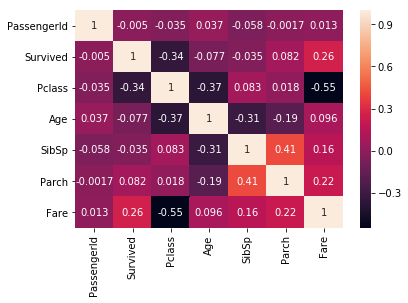

In [3]:
sns.heatmap(dataset.corr(),annot=True)

In [4]:
dataset=dataset.drop(columns=['PassengerId','Name','Ticket','Cabin'])

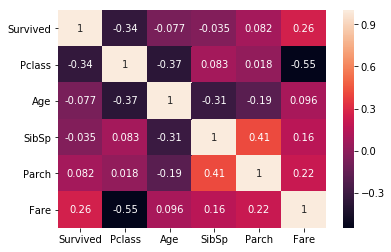

In [5]:
sns.heatmap(dataset.corr(),annot=True)

In [6]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [7]:
dataset.fillna(dataset.mean(),inplace=True)

In [8]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [11]:
y=dataset.iloc[:,0].values
x=dataset.iloc[:,1:].values

In [12]:
lc=LabelEncoder()

In [13]:
x[:,1]=lc.fit_transform(x[:,1])
x[:,-1]=lc.fit_transform(x[:,-1])

In [14]:
one=OneHotEncoder(categorical_features=[-1])

In [15]:
x=one.fit_transform(x).toarray()

C:\Users\LENOVO LAP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO LAP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [16]:
x=x[:,1:]

In [17]:
#0,1 = S
#0,0 = C
#1,0 = Q

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

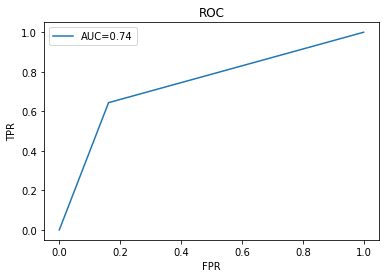

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC=%0.2f' % roc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()

In [20]:
x_test.shape

(178, 8)

In [21]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [22]:
x_test

array([[  0.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.8542],
       [  0.    ,   1.    ,   3.    , ...,   8.    ,   2.    ,  69.55  ],
       [  0.    ,   1.    ,   1.    , ...,   1.    ,   2.    , 120.    ],
       ...,
       [  0.    ,   1.    ,   3.    , ...,   4.    ,   2.    ,  31.3875],
       [  0.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,  30.5   ],
       [  0.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.75  ]])

In [23]:
dt.predict([[0,1,1,0,38,2,0,71.2]])

array([1], dtype=int64)

In [24]:
x_train[0]

array([ 1.        ,  0.        ,  3.        ,  1.        , 29.69911765,
        1.        ,  0.        , 15.5       ])

In [25]:
x[0]

array([ 0.  ,  1.  ,  3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25])